In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = fetch_california_housing()

In [4]:
dataset = pd.DataFrame(df.data, columns=df.feature_names)
dataset.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
dataset['Price'] = df.target
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]
y

,Price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

lin_reg = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.80, random_state=0)
lin_reg.fit(x_train, y_train)

mse = cross_val_score(lin_reg, x_train, y_train, scoring='neg_mean_squared_error', cv=10)
mse_mean = np.mean(mse)

y_pred = lin_reg.predict(x_test)

r2score_lin = r2_score(y_test, y_pred)
print(r2score_lin)

0.5943232652466202


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

lin_reg = LinearRegression()

mse = cross_val_score(lin_reg, x,y, scoring = 'neg_mean_squared_error', cv=5)

mse_mean = np.mean(mse)

lin_reg.fit(x, y)
predictions = lin_reg.predict(x_test)

r2score_lin = r2_score(y_test, y_pred)
print(r2score_lin)

0.5943232652466202


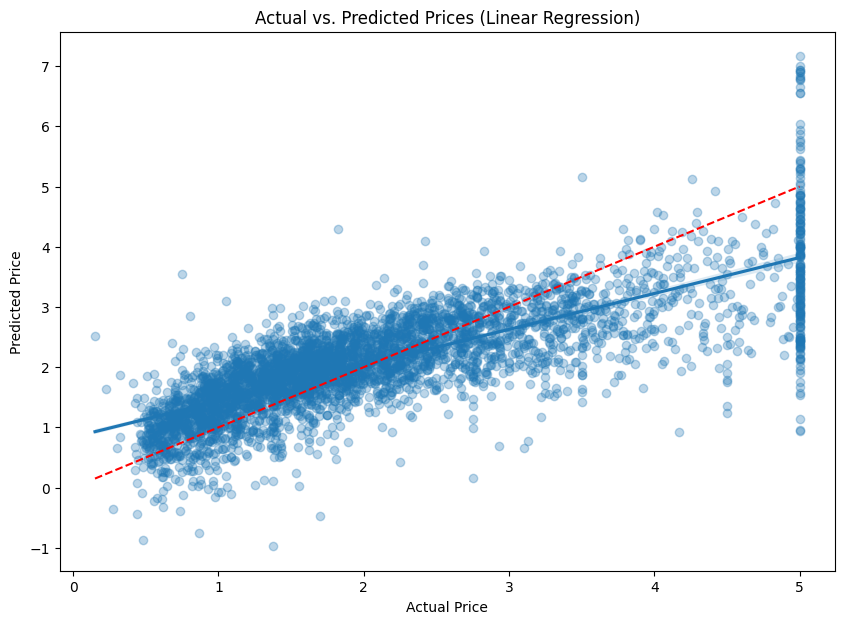

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.3})
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices (Linear Regression)")
plt.show()

In [10]:
print(f"Mean Squared Error from Cross-Validation: {-mse_mean}")

Mean Squared Error from Cross-Validation: 0.5582901717686546
